In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from functools import partial, reduce
import re, math, random

In [3]:
#
# functions for working with vectors
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
   return math.sqrt(squared_distance(v, w))

## 8.1 梯度下降思想

## 8.2 估算梯度   
差商估算法：直接使用微分的定義暴力估算

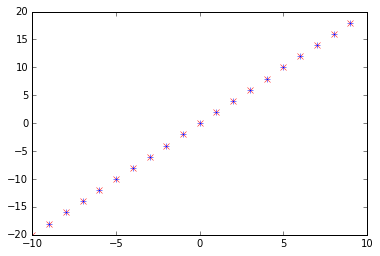

In [10]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

def plot_estimated_derivative():

    def square(x):
        return x * x

    def derivative(x):
        return 2 * x

    derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    x = range(-10,10)
    plt.plot(x, list(map(derivative, x)), 'rx')           # red  x
    plt.plot(x, list(map(derivative_estimate, x)), 'b+')  # blue +
    plt.show()                                      # purple *, hopefully

plot_estimated_derivative()

In [11]:
def partial_difference_quotient(f, v, i, h):

    # add h to just the i-th element of v
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]

    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]

## 8.3 使用梯度
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹，換句話說步長是錯的

In [23]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) 
    print(v)
    print(gradient)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
v

[8, 9, -7]
[16, 18, -14]
[7.84, 8.82, -6.86]
[15.68, 17.64, -13.72]
[7.6832, 8.643600000000001, -6.7228]
[15.3664, 17.287200000000002, -13.4456]
[7.529536, 8.470728000000001, -6.588344]
[15.059072, 16.941456000000002, -13.176688]
[7.37894528, 8.301313440000001, -6.45657712]
[14.75789056, 16.602626880000003, -12.91315424]
[7.2313663744, 8.135287171200002, -6.327445577600001]
[14.4627327488, 16.270574342400003, -12.654891155200001]
[7.086739046912, 7.972581427776001, -6.200896666048001]
[14.173478093824, 15.945162855552002, -12.401793332096002]
[6.94500426597376, 7.813129799220481, -6.076878732727041]
[13.89000853194752, 15.626259598440962, -12.153757465454081]
[6.806104180654285, 7.656867203236072, -5.9553411580725]
[13.61220836130857, 15.313734406472143, -11.910682316145]
[6.669982097041199, 7.50372985917135, -5.83623433491105]
[13.339964194082398, 15.0074597183427, -11.6724686698221]
[6.536582455100375, 7.353655261987923, -5.71950964821283]
[13.07316491020075, 14.707310523975845, -11.

[2.8461358189133394e-06, 3.2019027962775106e-06, -2.490368841549173e-06]

## 8.4 選擇正確步長
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹

## 8.5 綜合
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹

## 8.6 隨機梯度下降法
這個範例很奇怪，沒有使用微分，就是直接拿結果值硬幹